In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


# ***HEART FAILURE PREDICTION***

<img src="https://images.medicinenet.com/images/slideshow/heart-disease-visual-guide-s2-heart-attack.jpg">  

<h1 style="font-size:40px;font-family:"><i>Introduction</i></h1>

<p style="color:blue;font-size:21px;">Heart failure, sometimes called congestive heart failure, means the heart isn’t pumping blood as well as it should. Heart failure does not mean that the heart stops beating — that’s a common misperception. Instead, the heart keeps working, but the body’s need for blood and oxygen isn’t being met.</p>

<p style="color:blue;font-size:21px;">Your body depends on the heart’s pumping action to deliver oxygen- and nutrient-rich blood to the body’s cells. When the cells are nourished properly, the body can function normally. With heart failure, the weakened heart can’t supply the cells with enough blood. This results in fatigue and shortness of breath and some people have coughing. Everyday activities such as walking, climbing stairs or carrying groceries can become very difficult.</p>

<p style="color:blue;font-size:21px;">Heart failure is a serious condition, and usually there’s no cure. But many people with heart failure lead a full, enjoyable life when the condition is managed with heart failure medications and healthy lifestyle changes. It’s also helpful to have the support of family and friends who understand your condition.</p>

<h1 style="font-size:40px;font-family:"><i>Objective</i></h1>

 <p style="color:green;font-size:20px">
    In this notebook I will perform Exploratory Data Analysis on the Heart Failure Prediction Dataset which is a collection of 5 seperate dataset. The source of the data are as follows:</p>

<p style="color:green;font-size:20px">Cleveland: 303 observations</p>
<p style="color:green;font-size:20px">Hungarian: 294 observations</p>
<p style="color:green;font-size:20px">Switzerland: 123 observations</p>
<p style="color:green;font-size:20px">Long Beach VA: 200 observations</p>
<p style="color:green;font-size:20px">Stalog (Heart) Data Set: 270 </p>
<p style="color:green;font-size:20px">observations</p>
<p style="color:green;font-size:20px">Total: 1190 observations</p>
<p style="color:green;font-size:20px">Duplicated: 272 observations</p>
<p style="color:green;font-size:20px">We will mainly focus our observations on those patients only who 
    have any <b>HeartDisease</b></p>

<h1 style="font-size:40px;font-family:"><i>Table of Contents</i></h1>

* [1. IMPORTING LIBRARIES](#1)
* [2.BASIC INFORMATION ABOUT THE DATASET](#2)
* [3.CHECK FOR NULL VALUES](#4)
* [4.SEPERATE THE CATEGORICAL AND NUMERICAL(DISCRETE AND CONTINEOUS) FEATURES.](#4)
* [5.LET THE EDA COMMENCE](#5)



***Also check out my other notebooks:***

[1.FIFA19_EDA](http://www.kaggle.com/shreyasgangopadhyay/fifa19-eda)

[2.Why do students get the marks that they do](http://www.kaggle.com/shreyasgangopadhyay/why-do-students-get-the-marks-that-they-do)

# ***1.Importing the Libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading the dataset
df=pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# ***2.Basic Information about the dataset***

In [4]:
df.shape

(918, 12)

<p style="color:green;font-size:18px;">So the dataset has 918 rows and 12 columns</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


# ***3.Check for null values***

***This is an very important step for both EDA as well as data modelling.***

In [7]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

***Phew!!!There are no null values.***

In [8]:
dk=df[(df['HeartDisease']==1)]
dk.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


# ***4.Seperate the categorical,numerical(discrete and contineous)features.***

<p style="color:brown;font-size:20px"><b>
In this step we will seperate the categorical features from the non categorical features.
We will further seperate the numerical features into discrete and contineous. Here we are assuming that a numerical feature which have more than 25 distinct values is contineous and rest are discrete.This step will facilitate our univariate analysis.</b></p>

<p style="color:blue;font-size:16px"><b>a.Categorical Features</b></p>

***These features can take a fixed number of discrete non-numerical instances.***

In [9]:
non_numerical_data=[f for f in df.columns if df[f].dtype=='O']
non_numerical_data

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

<p style="color:blue;font-size:16px"><b>b.Numerical Features</b></p>

In [10]:
numerical_data=[f for f in df.columns if df[f].dtype!='O']
numerical_data

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<p style="color:blue;font-size:16px"><b> Contineous Numerical Features</b></p>

***These features have more than 25 distinct numeric instances***

In [11]:
numerical_data_contineous=[f for f in numerical_data if df[f].nunique()>25]
numerical_data_contineous

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

<p style="color:blue;font-size:16px"><b>Discrete Numerical Features</b></p>

***These features have less than 25 distinct numeric instances***

In [12]:
numerical_data_discrete=[f for f in numerical_data if df[f].nunique()<25]
numerical_data_discrete

['FastingBS', 'HeartDisease']

# ***5.Let the EDA commence***

***1.Univariate Analysis***

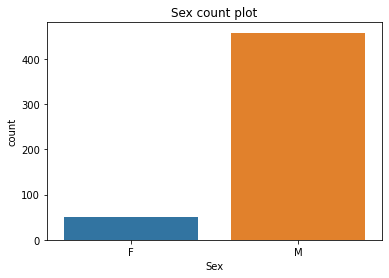

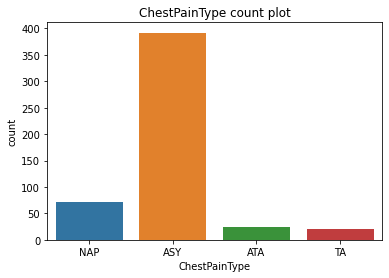

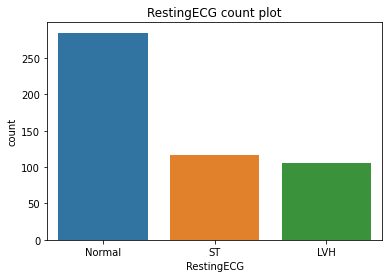

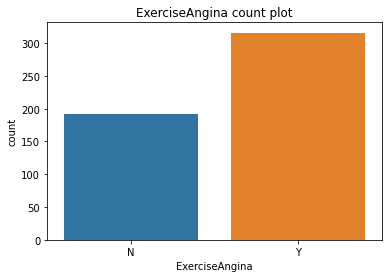

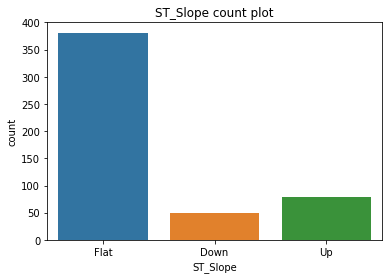

In [13]:
for f in non_numerical_data:
    sns.countplot(x=f,data=dk)
    plt.title(f+' count plot')
    plt.show()

<p style="color:brown;font-size:20px">
Let us go through the observations we made in this portion.

1.The number of men suffering from heartDisease is significantly larger than the number of women.

2.The chest pain type for people suffering with heartDisease is mostly ASY

3.The RestingECG for most people suffering with heartDisease is Normal

4.Most people had exercise induced [Angina](http://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373).

5.The ST slope for most people suffering with heartDisease is flat



the median value for the feature Age is 57.0


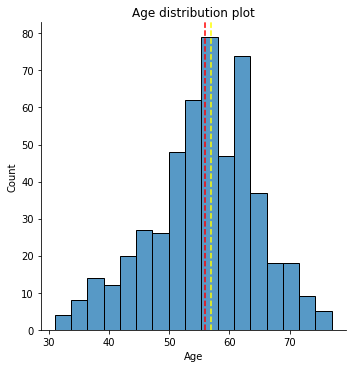

the median value for the feature RestingBP is 132.0


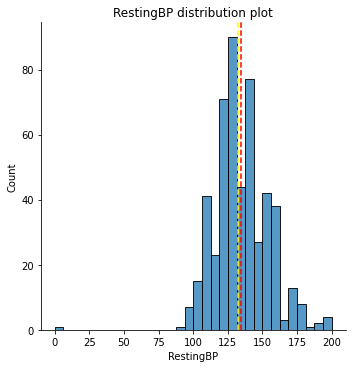

the median value for the feature Cholesterol is 217.0


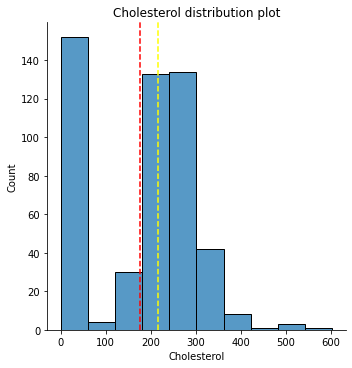

the median value for the feature MaxHR is 126.0


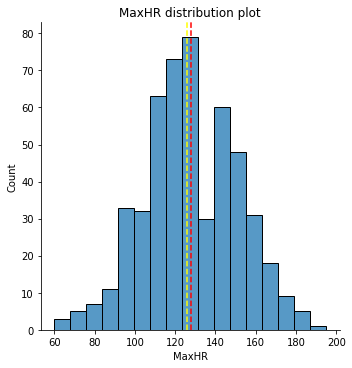

the median value for the feature Oldpeak is 1.2


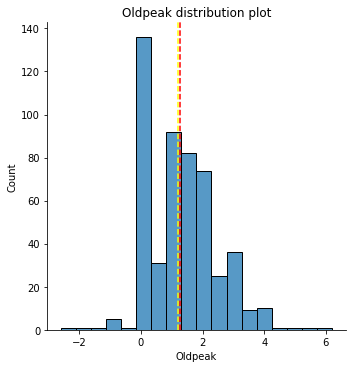

In [14]:
for f in numerical_data_contineous:
    sns.displot(x=dk[f])
    print('the median value for the feature '+f+' is',dk[f].median())
    plt.axvline(dk[f].mean(), linestyle = '--', color = "red")
    plt.axvline(dk[f].median(), linestyle = '--', color = "yellow")
    plt.title(f+' distribution plot')
    plt.show()

***Note:*** **We see that there are some very low values of Cholesterol. These may be some erraneous values. So we will take a closer look at the values of Cholesterol.**

In [15]:
np.sort(dk['Cholesterol'].unique(),axis=-1,kind=None,order=None)[:10]

array([  0, 100, 110, 113, 117, 123, 126, 131, 139, 142])

***So we see that there are some tuples where Cholesterol value is 0. This is not possible. So removing these tuples are advised.***

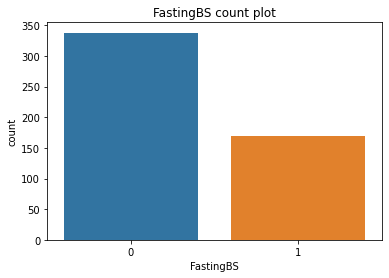

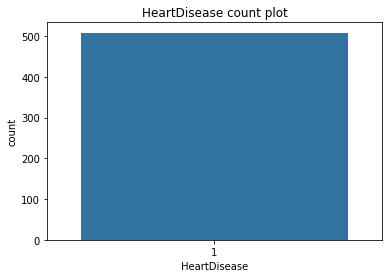

In [16]:
for f in numerical_data_discrete:
    sns.countplot(x=f,data=dk)
    plt.title(f+' count plot')
    plt.show()

***Most people with heartDisease has low FastingBlood Sugar.***

***2.Bivariate Analysis***


<p style="color:brown;font-size:20px"><b>AGE VS HEARTDISEASE COUNT:</b>Let us take a look at the which age group is most prone to HeartDisease</p>

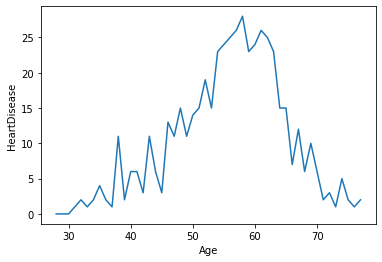

In [17]:
dt=pd.DataFrame()
dt=df.groupby(['Age'])[['HeartDisease']].sum()
sns.lineplot(x='Age',y='HeartDisease',data=dt)
plt.show()



<p style="color:brown;font-size:20px">It seems that the people belonging in mid 50's to mid 60's are most likely to suffer from HeartDisease. Let us take a closer look to find out whther we got it right.</p>

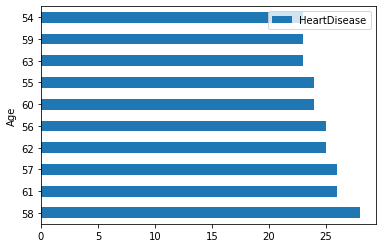

In [18]:
dt=dt.sort_values(by=['HeartDisease'],ascending=False)[:10]
dt.plot.barh()
plt.show()

<p style="color:brown;font-size:20px">It seems that our observations were right.</p>

<p style="color:brown;font-size:20px"><b>CHOLESTEROL VS RESTING BP:</b>High blood pressure (hypertension) and high cholesterol also are linked. When the arteries become hardened and narrowed with cholesterol plaque and calcium (atherosclerosis), the heart has to strain much harder to pump blood through them. As a result, blood pressure becomes abnormally high. <b>~Clevelandclinic.org</b></p>

[***For the full link click here***](http://my.clevelandclinic.org/health/articles/11918-cholesterol-high-cholesterol-diseases#:~:text=High%20blood%20pressure%20(hypertension)%20and,blood%20pressure%20becomes%20abnormally%20high.)

<p style="color:brown;font-size:20px">Let us see whether we can establish the above mentioned observation from our data.</p>

<p style="color:brown;font-size:22px"><b>Note</b></p>
<p style="color:brown;font-size:18px">
1.The upper threshold for normal level for LDL Cholesterol is 129mg/dL
<p style="color:brown;font-size:18px">
2.The upper threshold for normal level of RestingBP is 120/80mmHg


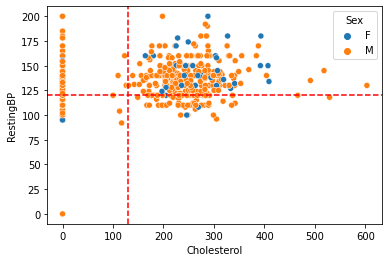

In [19]:
sns.scatterplot(x='Cholesterol',y='RestingBP',hue='Sex',data=dk)
plt.axvline(129, linestyle = '--', color = "red") #normal level for LDL 
plt.axhline(120, linestyle = '--', color = "red") #normal resting BP
plt.show()

<p style="color:brown;font-size:20px">It seems that most of the people with heartDisease has high level of both Cholesterol and Blood Pressure. Thus we can say conclude that there is a high correlation. We will also ignore the values corresponding to Cholesterol=0 as the data is erraneous </p>

***Thank you for going through the Notebook. Do give your feedbacks in the comment section. And do not forget to upvote if you like it.***

<p style="In this notebook,I will perform Exploratory Data Analysis on the Heart Failure dataset which is a collection of five dataset. The source of the datas are a follows

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations